In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
N = 20
p = 0.52



# Build lattice graph
g = ig.Graph.Lattice([N, N], circular=False, directed=False)
layout = g.layout("kk")

layout.rotate(-13) # se si vuole ruotare l'immagine, il numero è l'angolo di rotazione. Attenzione: Igraph ruota i network in base al parametro N

# Add vertex attribute for color
g.vs['color'] = 'white'

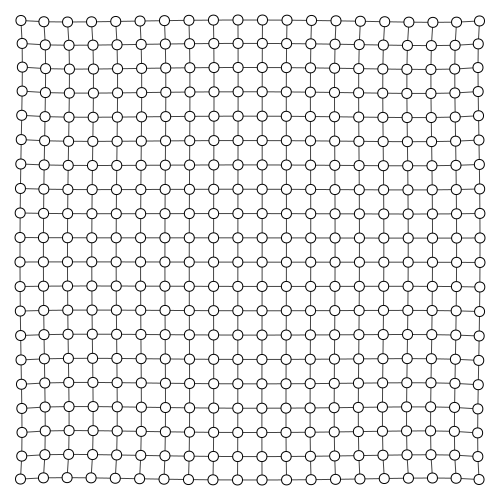

In [2]:
# Plot original lattice
ig.plot(g, layout=layout, vertex_size=10, vertex_color=g.vs['color'], bbox=(0,0,500,500))

In [3]:
# Generate random numbers and delete edges
rand = np.random.rand(g.ecount()) #genera n*n numeri random

In [4]:
g.delete_edges([e.index for e in g.es if rand[e.index] > p])

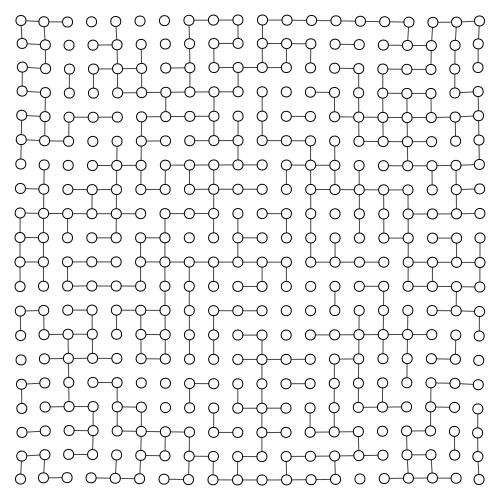

In [5]:
# Plot percolated lattice
ig.plot(g, layout=layout, vertex_size=10, vertex_color=g.vs['color'], bbox=(0,0,500,500))

In [6]:
# Calculate clusters and their sizes
clusters = g.connected_components()
sizes = clusters.sizes()

In [7]:
sizes.sort(reverse = True)
sizes.append(0) #così se sono tutti nel giant la size del 2° cluster darà 0

In [8]:
print(sizes)

[214, 71, 20, 18, 13, 5, 5, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [9]:
print(f"First cluster size: {sizes[0]}")
print(f"Second cluster size: {sizes[1]}")

First cluster size: 214
Second cluster size: 71
